@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/n2PpD7xnPoM

<h1 style="color:purple">Bosques de Aislamiento</h1>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


In [25]:
# Cargar datos
carros = np.loadtxt("../datos/carros_usados.csv", delimiter=",")
resultados = np.zeros((3, carros.shape[0]))

print(carros[:5])
print(carros.size)
print(carros.shape)

[[0.0373 1.    ]
 [0.0801 0.9025]
 [0.1405 0.574 ]
 [0.1775 0.7396]
 [0.1627 0.6292]]
156
(78, 2)


In [28]:
# Bosques de Aislamiento con diferente contaminación
c = [0.01, 0.05, 0.1] 
for i in range(len(c)):
    modelo = IsolationForest(contamination=c[i]).fit(carros)
    resultados[i] = modelo.predict(carros)
    
print(resultados[2])

[-1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1.  1.
  1. -1. -1. -1.  1. -1.]


<Figure size 640x480 with 0 Axes>

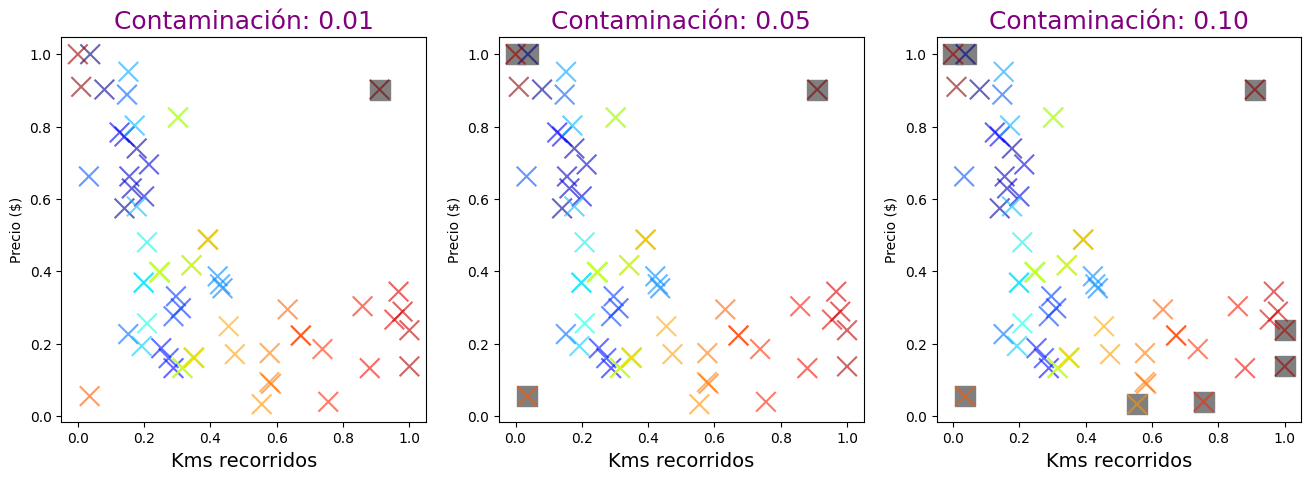

In [31]:
# Graficar datos anómalos 
plt.set_cmap("jet")
fig = plt.figure(figsize=(16, 5))

for i in range(len(c)):    
    ax = fig.add_subplot(1, 3, i+1)
    ax.scatter(carros[resultados[i]==-1][:, 0], 
               carros[resultados[i]==-1][:, 1], 
               c="gray", marker="s", s=200)
    ax.scatter(carros[:, 0], 
               carros[:, 1], 
               c=range(carros.size//2), marker="x",
               s=200, alpha=0.6)
    ax.set_title("Contaminación: %0.2f" % c[i], size=18, color="purple")
    ax.set_ylabel("Precio ($)", size=10)
    ax.set_xlabel("Kms recorridos", size=14)

plt.show()